In [2]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from shapely.geometry import MultiPolygon, Polygon
from datetime import date
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import folium 

In [3]:
user = 'moka46' 
password = 'momoka46' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [3]:
yogya = gpd.read_file('D:\Geospatial\Yogyakarta_Oversimplified\POLYGON.shp')
yogya

geometry
0  POLYGON ((110.44830 -7.53404, 110.26978 -7.706...

In [4]:
m = folium.Map([-7.80, 110.39], zoom_start=9)

folium.GeoJson(yogya).add_to(m)
m

In [ ]:
footprint = geojson_to_wkt(read_geojson('D:/Geospatial/Yogyakarta_Oversimplified/map.geojson'))
    
footprint

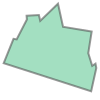

In [4]:
footprint = None
for i in yogya['geometry']:
    footprint = i
    
footprint

In [5]:
products = api.query(footprint,
                     date = ('20171201', '20171231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,50))

In [8]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

KeyError: 'cloudcoverpercentage'

In [8]:
api.download("43c6855f-edef-4557-acdb-4f017ce06299")

Product 43c6855f-edef-4557-acdb-4f017ce06299 is not online. Triggering retrieval from long term archive.


{'id': '43c6855f-edef-4557-acdb-4f017ce06299',
 'title': 'S2A_MSIL1C_20170807T023551_N0205_R089_T49MDM_20170807T025548',
 'size': 812377632,
 'md5': 'F193EFF90CD23E56F9AB5E4C91BB89ED',
 'date': datetime.datetime(2017, 8, 7, 2, 35, 51, 26000),
 'footprint': 'POLYGON((110.09383235449491 -7.236383230679499,111.08841033205219 -7.23727611900566,111.08861734702597 -8.23048908614055,110.09171089225154 -8.22947212599136,110.09383235449491 -7.236383230679499))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('43c6855f-edef-4557-acdb-4f017ce06299')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2017, 9, 1, 23, 5, 33, 548000),
 'Ingestion Date': datetime.datetime(2017, 9, 1, 23, 3, 49, 496000),
 'path': '.\\S2A_MSIL1C_20170807T023551_N0205_R089_T49MDM_20170807T025548.zip',
 'downloaded_bytes': 0}

In [1]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [3]:
l1c = rasterio.open('D:\Geospatial\Sentinel/2019-11-15\S2A_MSIL1C_20191115T023951_N0208_R089_T49MDM_20191115T060844.SAFE\GRANULE\L1C_T49MDM_A022966_20191115T025622\IMG_DATA\T49MDM_20191115T023951_TCI.jp2')
l2a = rasterio.open('D:\Geospatial\Sentinel/2019-11-15\S2A_MSIL2A_20191115T023951_N0208_R089_T49MDM_20191115T060844.SAFE\GRANULE\L2A_T49MDM_A022966_20191115T025622\IMG_DATA\R10m\T49MDM_20191115T023951_TCI_10m.jp2')

In [ ]:
band_red = rasterio.open('D:\Geospatial\S2A_MSIL2A_20191115T023951_N0213_R089_T49MDM_20191115T063716.SAFE\GRANULE\L2A_T49MDM_A022966_20191115T025622\IMG_DATA\R10m\T49MDM_20191115T023951_B04_10m.jp2')
band_nir = rasterio.open('D:\Geospatial\S2A_MSIL2A_20191115T023951_N0213_R089_T49MDM_20191115T063716.SAFE\GRANULE\L2A_T49MDM_A022966_20191115T025622\IMG_DATA\R10m\T49MDM_20191115T023951_B08_10m.jp2')

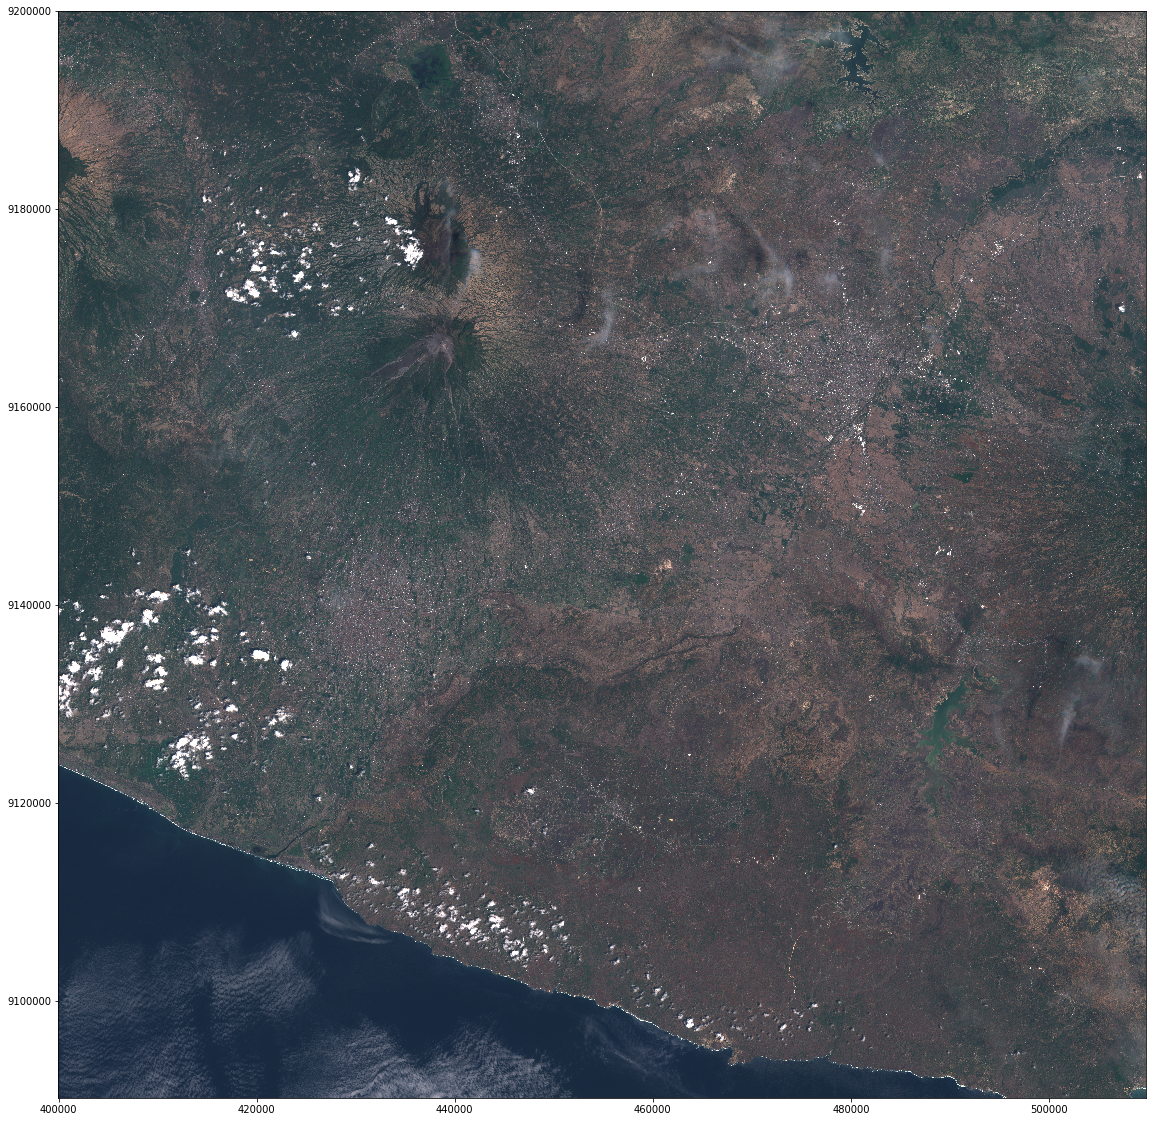

In [8]:
fig, ax = plt.subplots(1, figsize=(20, 20))
show(l1c, ax=ax)
plt.show()

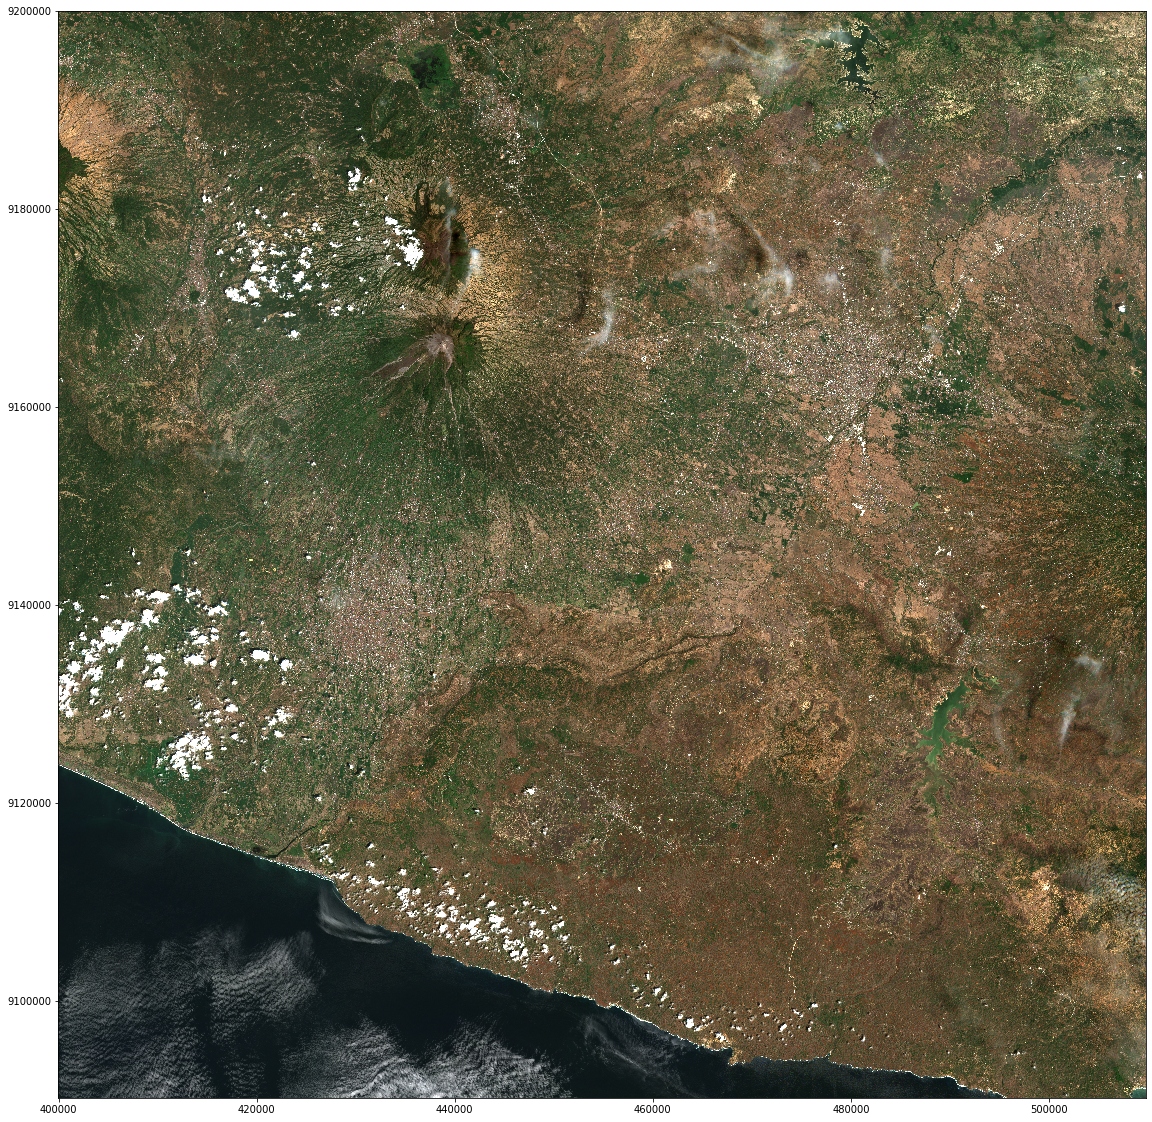

In [6]:
fig, ax = plt.subplots(1, figsize=(20, 20))
show(l2a, ax=ax)
plt.show()